Create the macro to run on all calibrated data
check problem with trans, unpo etc for bat8 data

The idea is to create a macro that plot what we want from the h5 fies created with evaluation.
Compulsary plot for binary e regression sono gli hist da salvare, mentre per la regression vorrei i plot delle differenze.
Per la binary?

(la meglio potrebbe essere una classe...)
Potrei usare un parser con input:
- inl calibrated h5 long file
- int callibrated h5 trans file
- inu calibrated unpolarized h5 file 
- o output folder
- meth (bool) regression1/binary0
- b binning degli istogrammi
- sel parsing dei vari modelli per selezionare quello che mi serve (prendo spunto da -P che uso in evaluation)
- nev?? 
- diff (bool) (if meth=1) 1=plot differenze, 0 default
- save (bool) saving figure in pdf format

In [1]:
import os
import sys
import configparser

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
#http://www.pererikstrandberg.se/blog/index.cgi?page=PythonPandasFirstLook

In [3]:
hdf_long = pd.read_hdf('/Users/it058990/Desktop/MicheleG/PhD/VBS_COST_Group/GITBicocca/DNN_storage/evaluation/unpol_VBS_WWmuvWqq_phantom_1_6_nob_17jan/all/mu_ewk_semilept_long_nob_lhe528104_train.calibrated.h5')

In [4]:
hdf_trans = pd.read_hdf('/Users/it058990/Desktop/MicheleG/PhD/VBS_COST_Group/GITBicocca/DNN_storage/evaluation/unpol_VBS_WWmuvWqq_phantom_1_6_nob_17jan/all/mu_ewk_semilept_trans_nob_lhe539538_train.calibrated.h5')

In [5]:
hdf_unpol = pd.read_hdf('/Users/it058990/Desktop/MicheleG/PhD/VBS_COST_Group/GITBicocca/DNN_storage/evaluation/unpol_VBS_WWmuvWqq_phantom_1_6_nob_17jan/unpolll/mu_ewk_semilept_unpol_nob_lhe1060439_train.calibrated.h5')

In [6]:
hdf_full_comp = pd.read_hdf('/Users/it058990/Desktop/MicheleG/PhD/VBS_COST_Group/GITBicocca/DNN_storage/evaluation/unpol_VBS_WWmuvWqq_phantom_1_6_nob_17jan/unpolll/mu_ewk_semilept_nob_unpol_full_comp_lhe1070472_train.calibrated.h5')

In [7]:
hdf_long.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 528104 entries, 0 to 600135
Columns: 135 entries, flavour to neu100hid10bat128_e100
dtypes: float32(71), float64(61), int32(2), int64(1)
memory usage: 400.9 MB


In [8]:
hdf_long.columns

Index(['flavour', 'mu_E', 'mu_px', 'mu_py', 'mu_pz', 'sign', 'v_mu_E',
       'v_mu_px', 'v_mu_py', 'v_mu_pz',
       ...
       'neu60hid8bat8_e100', 'neu100hid6bat32_e100', 'neu20hid8bat128_e100',
       'neu20hid6bat8_e100', 'neu100hid8bat8_e100', 'neu200hid2bat8_e100',
       'neu20hid4bat8_e100', 'neu60hid3bat128_e100', 'neu200hid3bat8_e100',
       'neu100hid10bat128_e100'],
      dtype='object', length=135)

In [9]:
#drop_list = ['neu20hid8bat8_e100','neu20hid10bat8_e100','neu60hid10bat8_e100','neu60hid10bat8_e100']

In [10]:
#to_rm = ['hid10','bat8_']
to_rm = ['bat8','hid10','20hid8']

import fnmatch
for r in range(len(to_rm)):
    print(to_rm[r])
    bad_mod = fnmatch.filter(hdf_long.columns, '*'+to_rm[r]+'*')
    hdf_long = hdf_long.drop(bad_mod,axis=1)
    hdf_trans.drop(bad_mod,axis=1)
    hdf_unpol.drop(bad_mod,axis=1)
    hdf_full_comp.drop(bad_mod,axis=1)
    print(bad_mod)

bat8
['neu100hid6bat8_e100', 'neu60hid3bat8_e100', 'neu20hid8bat8_e100', 'neu60hid2bat8_e100', 'neu100hid4bat8_e100', 'neu200hid8bat8_e100', 'neu20hid10bat8_e100', 'neu60hid4bat8_e100', 'neu100hid3bat8_e100', 'neu60hid6bat8_e100', 'neu100hid2bat8_e100', 'neu60hid10bat8_e100', 'neu100hid10bat8_e100', 'neu200hid6bat8_e100', 'neu200hid4bat8_e100', 'neu20hid3bat8_e100', 'neu20hid2bat8_e100', 'neu60hid8bat8_e100', 'neu20hid6bat8_e100', 'neu100hid8bat8_e100', 'neu200hid2bat8_e100', 'neu20hid4bat8_e100', 'neu200hid3bat8_e100']
hid10
['neu100hid10bat32_e100', 'neu60hid10bat128_e100', 'neu200hid10bat128_e100', 'neu20hid10bat32_e100', 'neu200hid10bat32_e100', 'neu20hid10bat128_e100', 'neu60hid10bat32_e100', 'neu100hid10bat128_e100']
20hid8
['neu20hid8bat32_e100', 'neu20hid8bat128_e100']


In [11]:
hdf_long.columns[4:]

Index(['mu_pz', 'sign', 'v_mu_E', 'v_mu_px', 'v_mu_py', 'v_mu_pz', 'q_fin_px1',
       'q_fin_px2', 'q_fin_px3', 'q_fin_px4', 'q_fin_py1', 'q_fin_py2',
       'q_fin_py3', 'q_fin_py4', 'q_fin_pz1', 'q_fin_pz2', 'q_fin_pz3',
       'q_fin_pz4', 'q_fin_E1', 'q_fin_E2', 'q_fin_E3', 'q_fin_E4',
       'q_init_px1', 'q_init_px2', 'q_init_py1', 'q_init_py2', 'q_init_pz1',
       'q_init_pz2', 'q_init_E1', 'q_init_E2', 'mu_a', 'mu_b', 'mu_c',
       'mu_delta', 'v_mu_sol0', 'v_mu_sol1', 'v_mu_label', 'v_mu_predict_E0',
       'v_mu_predict_E1', 'truth_cos_theta', 'event0_mass', 'event1_mass',
       'mu_pt', 'mu_eta', 'mu_phi', 'v_mu_pt', 'v_mu_eta', 'v_mu_phi',
       'q_fin1_pt', 'q_fin1_eta', 'q_fin1_phi', 'q_fin2_pt', 'q_fin2_eta',
       'q_fin2_phi', 'q_fin3_pt', 'q_fin3_eta', 'q_fin3_phi', 'q_fin4_pt',
       'q_fin4_eta', 'q_fin4_phi', 'neu20hid6bat128_e100',
       'neu200hid6bat32_e100', 'neu60hid3bat32_e100', 'neu20hid6bat32_e100',
       'neu200hid2bat128_e100', 'neu20hid4bat128_e

In [12]:
binning ='\-1,1,0.03'

In [13]:
binning = binning.replace('\\', '')
bins = binning.split(',')

In [14]:
b1,b2,b3 = float(bins[0]), float(bins[1]), float(bins[2])

In [ ]:
#import fnmatch

In [ ]:
#test on LONG
#fig_long = plt.figure(1)
#plt.legend(loc='upper left', ncol=3, fancybox=True, fontsize='small')
#plt.title('Longitudinal polarization')
#plt.xlabel('cos'+r'$\theta$')
#plt.ylabel('Number of events')
#fig_long.savefig(self.config.get('evaluation', 'output') + '/theta_long.pdf')

#h_long_true = plt.hist(hdf_long['truth_cos_theta'],np.arange(b1, b2, b3),alpha = 0.5, edgecolor='black', linewidth=2.1, label='truth')


In [15]:
#input 4 figures and output
## CHECK XK NON VA LABEL!!!
def plot_plot(model,avlb_pol):
    name = model[:-5]
    for pol_type in avlb_pol:
        if pol_type == 'long':
            plt.figure(1)
            plt.legend()
            h_long = plt.hist(hdf_long[model].values, np.arange(b1, b2, b3),alpha=0.3, label=name)

        elif pol_type == 'trans':
            plt.figure(2)
            plt.legend()
            h_trans = plt.hist(hdf_trans[model].values, np.arange(b1, b2, b3),alpha=0.3, label=name)

        elif pol_type == 'unpol':
            plt.figure(3)
            plt.legend()
            h_unpol = plt.hist(hdf_unpol[model].values, np.arange(b1, b2, b3),alpha=0.3, label=name)

        elif pol_type == 'fullcomp':
            plt.figure(4)
            plt.legend()
            h_full = plt.hist(hdf_full_comp[model].values, np.arange(b1, b2, b3),alpha=0.3, label=name)

        else:
            print('wrong polarization')
    #np.savez(self.config.get('evaluation', 'output') + '/h_' + model_dir, unpol=h_unpol, trans=h_trans, long=h_long, dlong = d_long, dtrans = d_trans)
    np.savez('h_' + model, unpol=h_unpol, trans=h_trans, long=h_long)

In [ ]:
#import itertools
#combo = list(itertools.product(*(neu_sel,bat_sel, hid_sel)))
#combo

In [39]:
neu_sel = 'neu100'
bat_sel = 'bat128'
hid_sel = ''
#'*'+plot_selection[0]+'*'

In [40]:
fnmatch.filter(hdf_long.columns,'*' + neu_sel+'*'+hid_sel+'*'+bat_sel+'*' )

['neu100hid3bat128_e100',
 'neu100hid4bat128_e100',
 'neu100hid6bat128_e100',
 'neu100hid2bat128_e100',
 'neu100hid8bat128_e100']

/Users/it058990/anaconda3/lib/python3.6/site-packages/matplotlib/cbook/deprecation.py:107: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  warnings.warn(message, mplDeprecation, stacklevel=1)


['neu100hid3bat128_e100', 'neu100hid4bat128_e100', 'neu100hid6bat128_e100', 'neu100hid2bat128_e100', 'neu100hid8bat128_e100']
##############################
neu100hid3bat128_e100
neu100hid4bat128_e100
neu100hid6bat128_e100
neu100hid2bat128_e100
neu100hid8bat128_e100
plotting executed


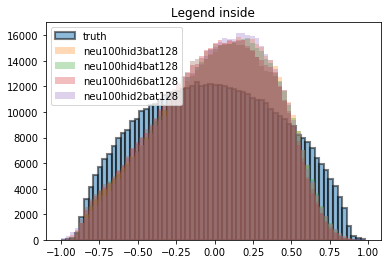

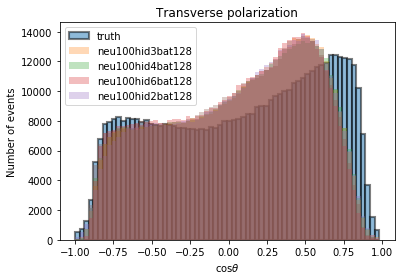

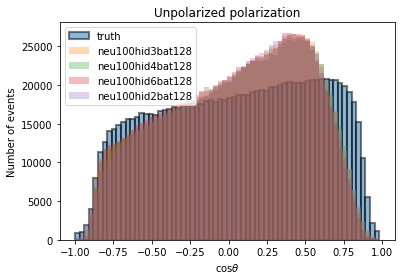

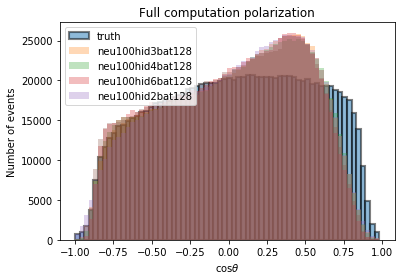

In [42]:
#here create the figure

#######LONGITUDINAL
fig_long = plt.figure(1)
h_long_true = plt.hist(hdf_long['truth_cos_theta'],np.arange(b1, b2, b3),alpha = 0.5, edgecolor='black', linewidth=2.1, label='truth')

plt.figure(1)
plt.legend(loc='upper left', ncol=3, fancybox=True, fontsize='small')
plt.title('Longitudinal polarization')
plt.xlabel('cos'+r'$\theta$')
plt.ylabel('Number of events')
#fig_long.savefig(self.config.get('evaluation', 'output') + '/theta_long.pdf')


#########transverse
fig_trans = plt.figure(2)
h_trans_true = plt.hist(hdf_trans['truth_cos_theta'], np.arange(b1,b2,b3), alpha = 0.5, edgecolor='black', linewidth=2.1, label='truth')

plt.figure(2)
plt.legend(loc='upper left', ncol=3, fancybox=True, fontsize='small')
plt.title('Transverse polarization')
plt.xlabel('cos'+r'$\theta$')
plt.ylabel('Number of events')
#fig_trans.savefig(self.config.get('evaluation', 'output') + '/theta_long.pdf')

#######unpolarized
fig_unpol = plt.figure(3)
h_unpol_true = plt.hist(hdf_unpol['truth_cos_theta'], np.arange(b1,b2,b3), alpha = 0.5, edgecolor='black', linewidth=2.1, label='truth')

plt.figure(3)
plt.legend(loc='upper left', ncol=3, fancybox=True, fontsize='small')
plt.title('Unpolarized polarization')
plt.xlabel('cos'+r'$\theta$')
plt.ylabel('Number of events')
#fig_unpol.savefig(self.config.get('evaluation', 'output') + '/theta_unpol.pdf')

######full computation
fig_full = plt.figure(4)
h_fullcomp_true = plt.hist(hdf_full_comp['truth_cos_theta'], np.arange(b1,b2,b3), alpha = 0.5, edgecolor='black', linewidth=2.1, label='truth')

plt.figure(4)
plt.legend(loc='upper left', ncol=3, fancybox=True, fontsize='small')
plt.title('Full computation polarization')
plt.xlabel('cos'+r'$\theta$')
plt.ylabel('Number of events')
#fig_full.savefig(self.config.get('evaluation', 'output') + '/theta_full.pdf')

########################   saving all truth things
#np.savez(self.config.get('evaluation', 'output') + '/h_truth',unpol=h_unpol_true, trans=h_trans_true, long=h_long_true)


##loop throuth model selected

#for s in range(len(plot_selection)):
        
good = fnmatch.filter(hdf_long.columns,'*' + neu_sel+'*'+hid_sel+'*'+bat_sel+'*' )
print(good)
print('#'*30)
for c in good:
    print(c)
    plot_plot(c,['long','trans','unpol','fullcomp'])
    
print('plotting executed')
#fig_long.savefig('theta_long.pdf')
#fig_trans.savefig('trans.pdf')

In [ ]:
#import libraries
#!pip install progressbar
import progressbar as pb

#initialize widgets
widgets = ['Time for loop of 1 000 000 iterations: ', pb.Percentage(), ' ', 
            pb.Bar(marker=pb.RotatingMarker()), ' ', pb.ETA()]
#initialize timer
timer = pb.ProgressBar(widgets=widgets, maxval=1000000).start()

#for loop example
for i in range(0,1000000):
    #update
    timer.update(i)
#finish
timer.finish()

In [ ]:
#cell to test wrong plot
plt.hist(hdf_long['neu20hid8bat128_e100'].values, np.arange(b1, b2, b3))
plt.show()